Kumpulan data ini berisi informasi tentang lagu dan artis di platform streaming musik. Itu dibuat dari web dan dikompilasi untuk menyertakan metrik berikut:

Posisi: Peringkat lagu di Spotify

Nama Artis : Nama artis

Nama Lagu: Nama lagu

Hari: Jumlah hari sejak rilis lagu (diperbarui)

Top 10 (xTimes): Frekuensi lagu muncul di 10 besar

Posisi Puncak: Posisi tertinggi yang dicapai lagu

Posisi Puncak (xTimes): Berapa kali lagu mencapai posisi puncaknya

Aliran Puncak: Jumlah total aliran selama posisi puncak

Total Aliran: Total jumlah aliran untuk lagu tersebut

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Load the dataset
df = pd.read_csv('Spotify_final_dataset.csv')

In [6]:
df.head()

,Position,Artist Name,Song Name,Days,Top 10 (xTimes),Peak Position,Peak Position (xTimes),Peak Streams,Total Streams
0,1,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1506,302.0,1,(x29),2118242,883369738
1,2,Juice WRLD,Lucid Dreams,1673,178.0,1,(x20),2127668,864832399
2,3,Lil Uzi Vert,XO TOUR Llif3,1853,212.0,1,(x4),1660502,781153024
3,4,J. Cole,No Role Modelz,2547,6.0,7,0,659366,734857487
4,5,Post Malone,rockstar,1223,186.0,1,(x124),2905678,718865961


In [7]:
# Shape of the dataset
df.shape

(11084, 9)

In [8]:
# Data types of the columns
df.dtypes

Position                    int64
Artist Name                object
Song Name                  object
Days                        int64
Top 10 (xTimes)           float64
Peak Position               int64
Peak Position (xTimes)     object
Peak Streams                int64
Total Streams               int64
dtype: object

In [12]:
# Missing values
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 4
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

In [13]:
#Dropping Null Values
df = df.dropna(axis=0)
df.isnull().sum()

Position                  0
Artist Name               0
Song Name                 0
Days                      0
Top 10 (xTimes)           0
Peak Position             0
Peak Position (xTimes)    0
Peak Streams              0
Total Streams             0
dtype: int64

***EDA***

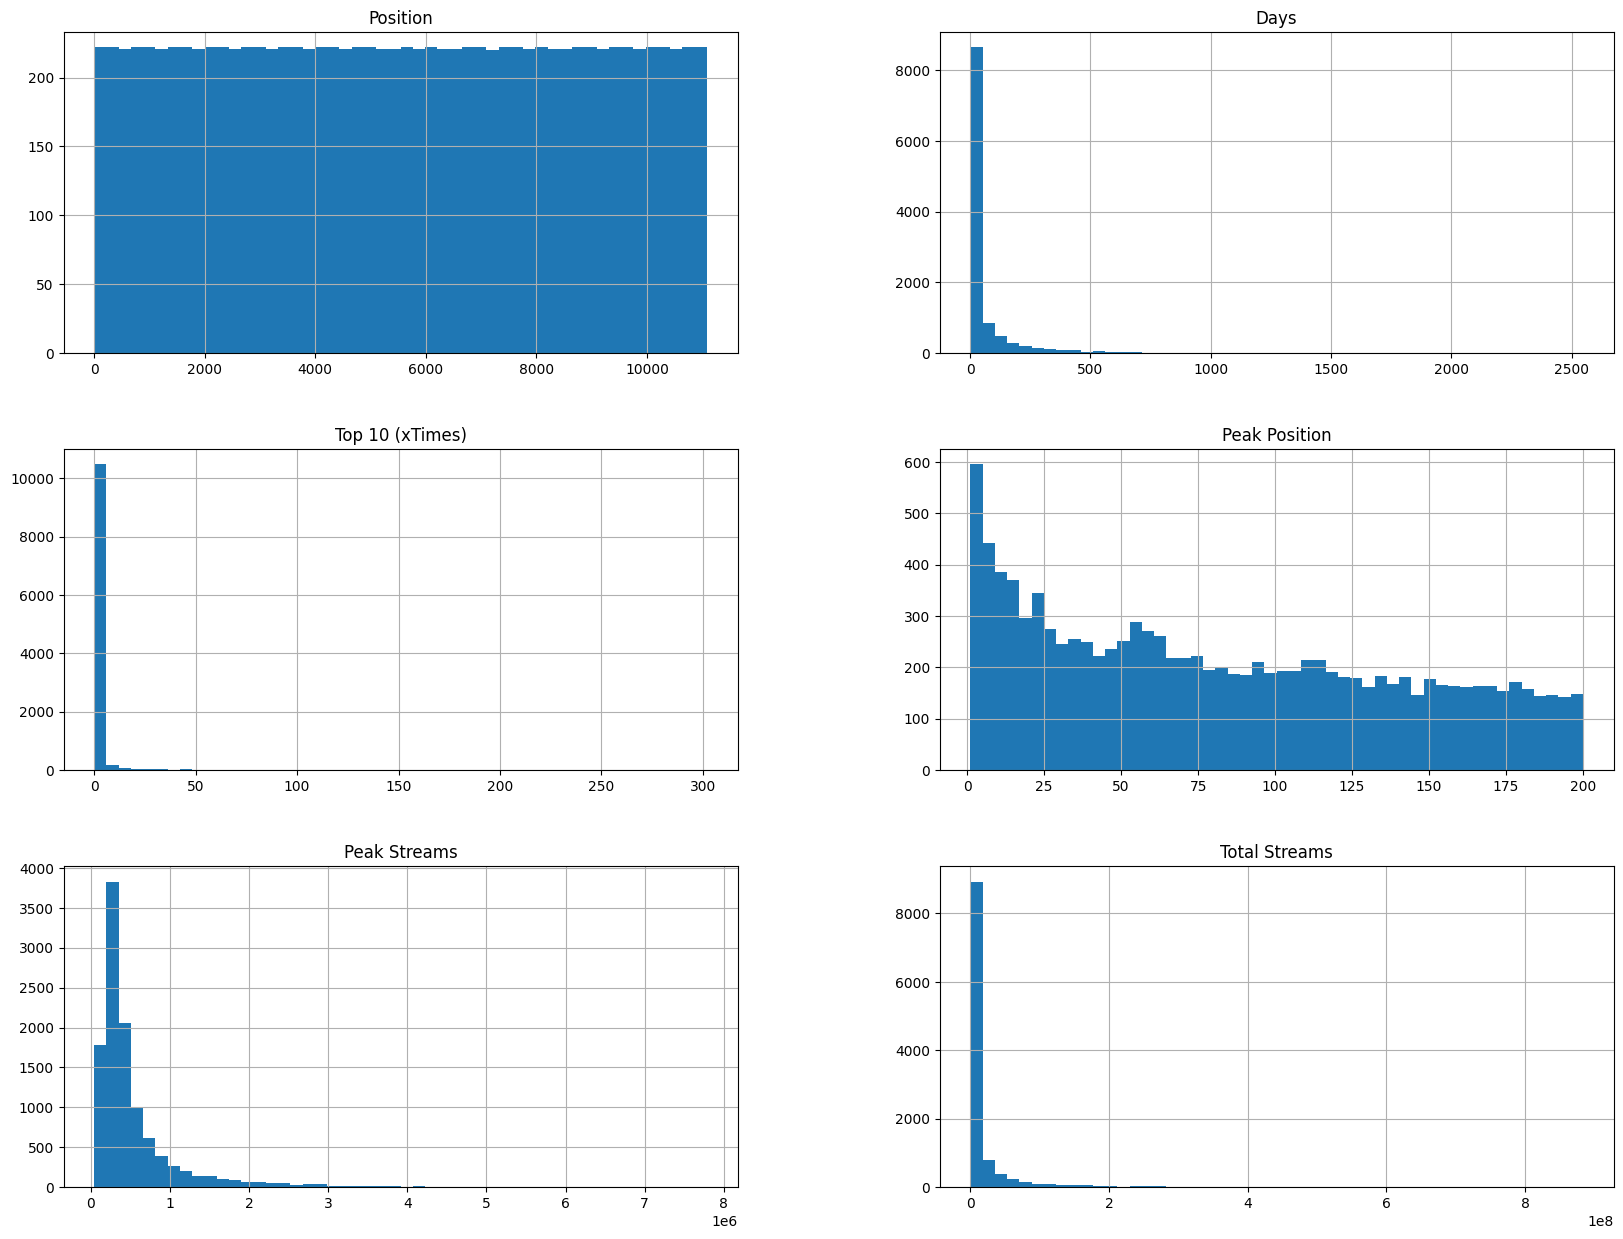

In [14]:
# Distribution of variables
df.hist(bins=50, figsize=(20,15))
plt.show()

<ipython-input-15-a4a9b97538d8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


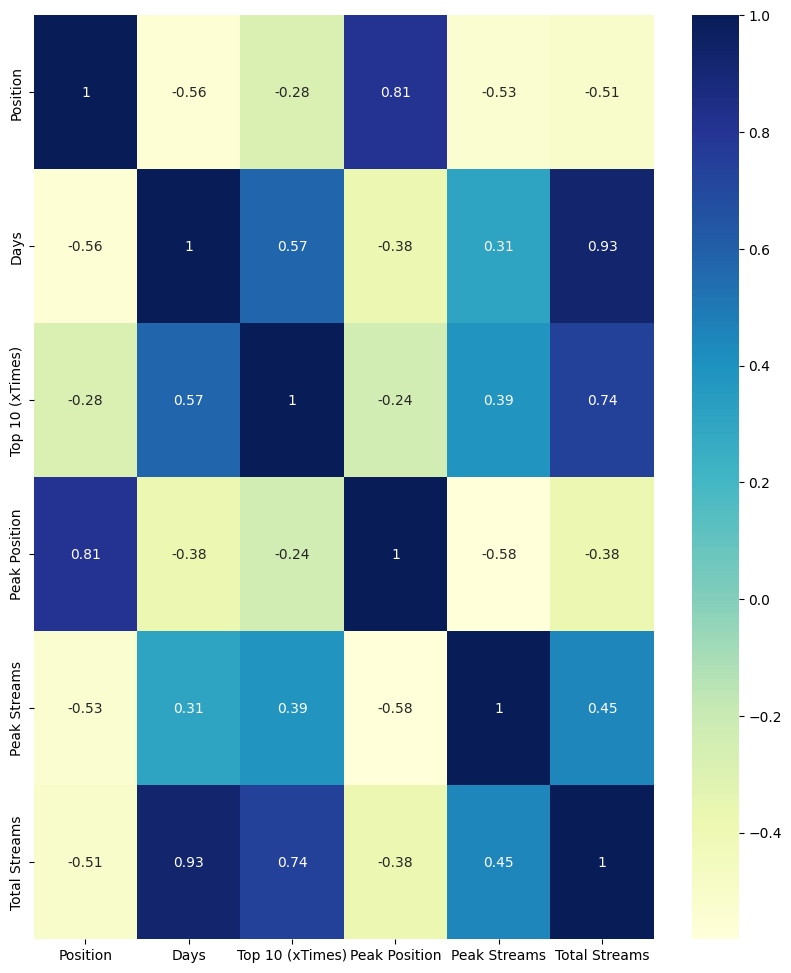

In [15]:
# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")
plt.show()

In [16]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

**Nama Lagu VS Posisi Puncak - Scatter Plot**

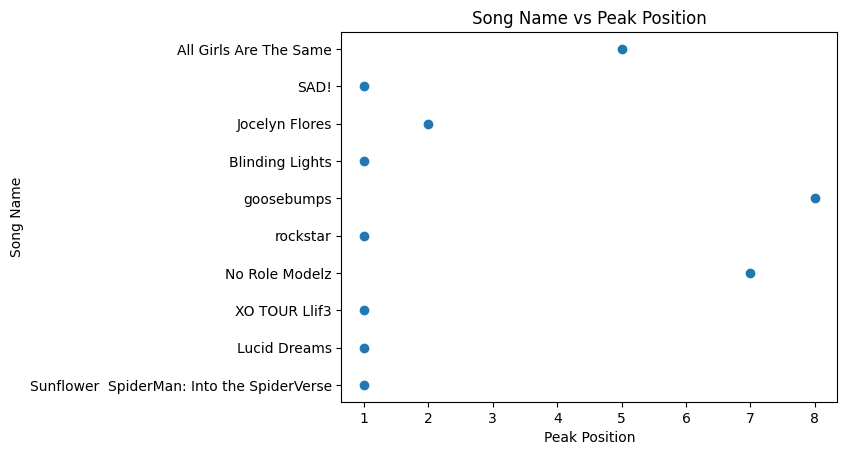

In [17]:
plt.scatter(df['Peak Position'].head(10), df['Song Name'].head(10))
plt.xlabel('Peak Position')
plt.ylabel('Song Name')
plt.title('Song Name vs Peak Position')
plt.show()

**5 Lagu Teratas Dengan Jumlah Aliran Tertinggi**

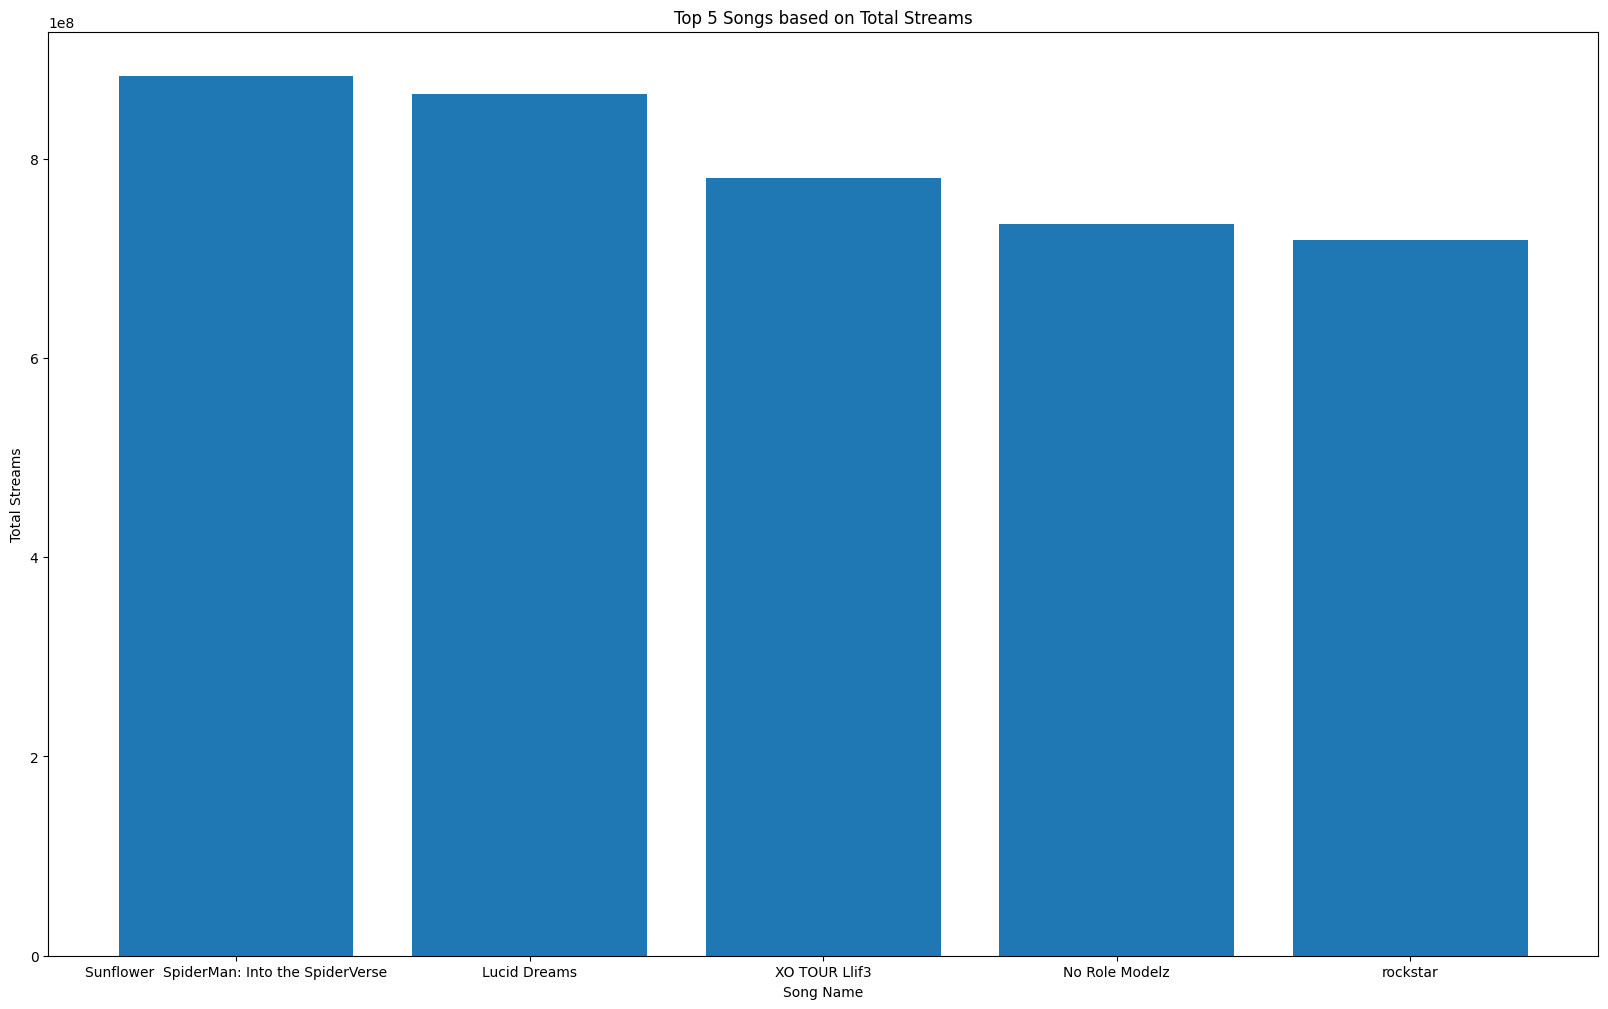

In [18]:
df.sort_values("Total Streams", ascending=False, inplace=True)


plt.figure(figsize=(20,12))
plt.bar(df["Song Name"][:5], df["Total Streams"][:5])


plt.xlabel("Song Name")
plt.ylabel("Total Streams")
plt.title("Top 5 Songs based on Total Streams")


plt.show()

Kode ini menggunakan pustaka panda untuk memuat kumpulan data ke dalam kerangka data dan mengurutkan lagu berdasarkan total aliran. Pustaka matplotlib digunakan untuk membuat grafik batang untuk memvisualisasikan 5 lagu teratas berdasarkan total aliran. Fungsi xlabel, ylabel, dan judul digunakan untuk menambahkan label dan judul ke grafik. Terakhir, fungsi show digunakan untuk menampilkan plot.

**5 Lagu Terbawah Dengan Jumlah Streaming Terendah**

Text(0.5, 1.0, 'Bottom 5 Songs based on Total Streams')

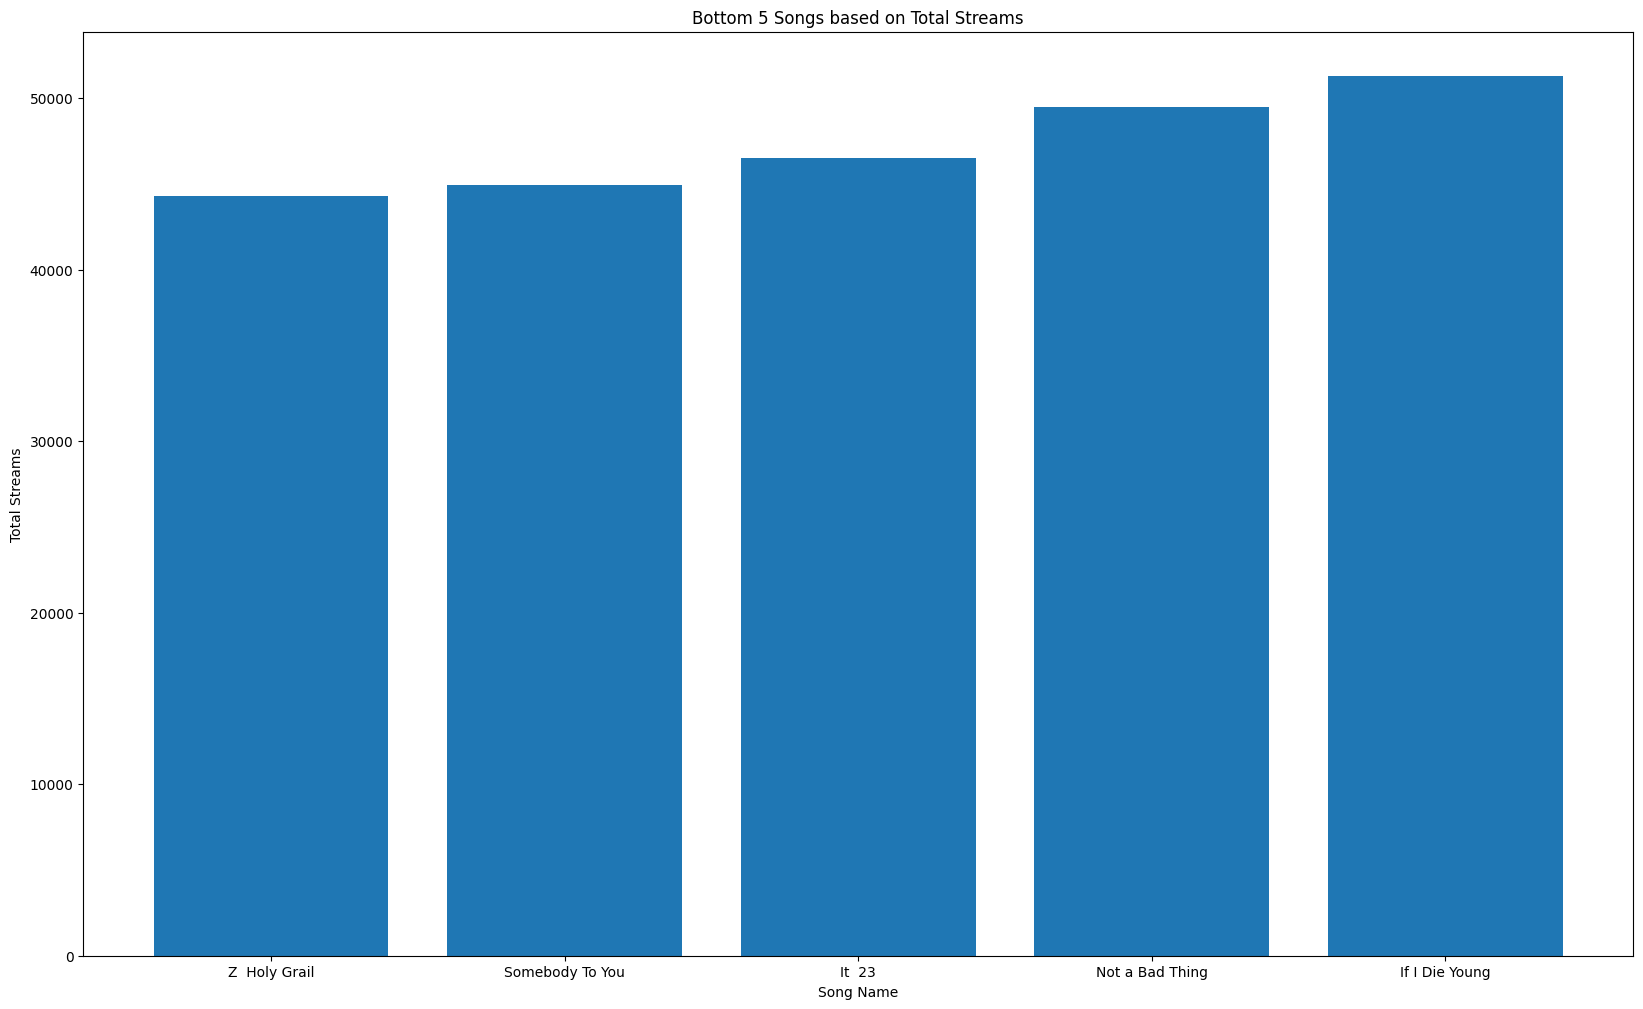

In [19]:
# Sort the songs by total streams in descending order
df.sort_values("Total Streams", ascending=True, inplace=True)

# Plot a bar graph to visualize the top songs based on streams
plt.figure(figsize=(20,12))
plt.bar(df["Song Name"][:5], df["Total Streams"][:5])

# Add labels and title to the graph
plt.xlabel("Song Name")
plt.ylabel("Total Streams")
plt.title("Bottom 5 Songs based on Total Streams")

# Show the plot

Kode ini menggunakan pustaka panda untuk memuat kumpulan data ke dalam kerangka data dan mengurutkan lagu berdasarkan total aliran. Pustaka matplotlib digunakan untuk membuat grafik batang untuk memvisualisasikan 5 lagu terbawah berdasarkan total aliran. Fungsi xlabel, ylabel, dan judul digunakan untuk menambahkan label dan judul ke grafik. Terakhir, fungsi show digunakan untuk menampilkan plot.

**10 Artis Teratas dengan lagu Hit terbanyak**

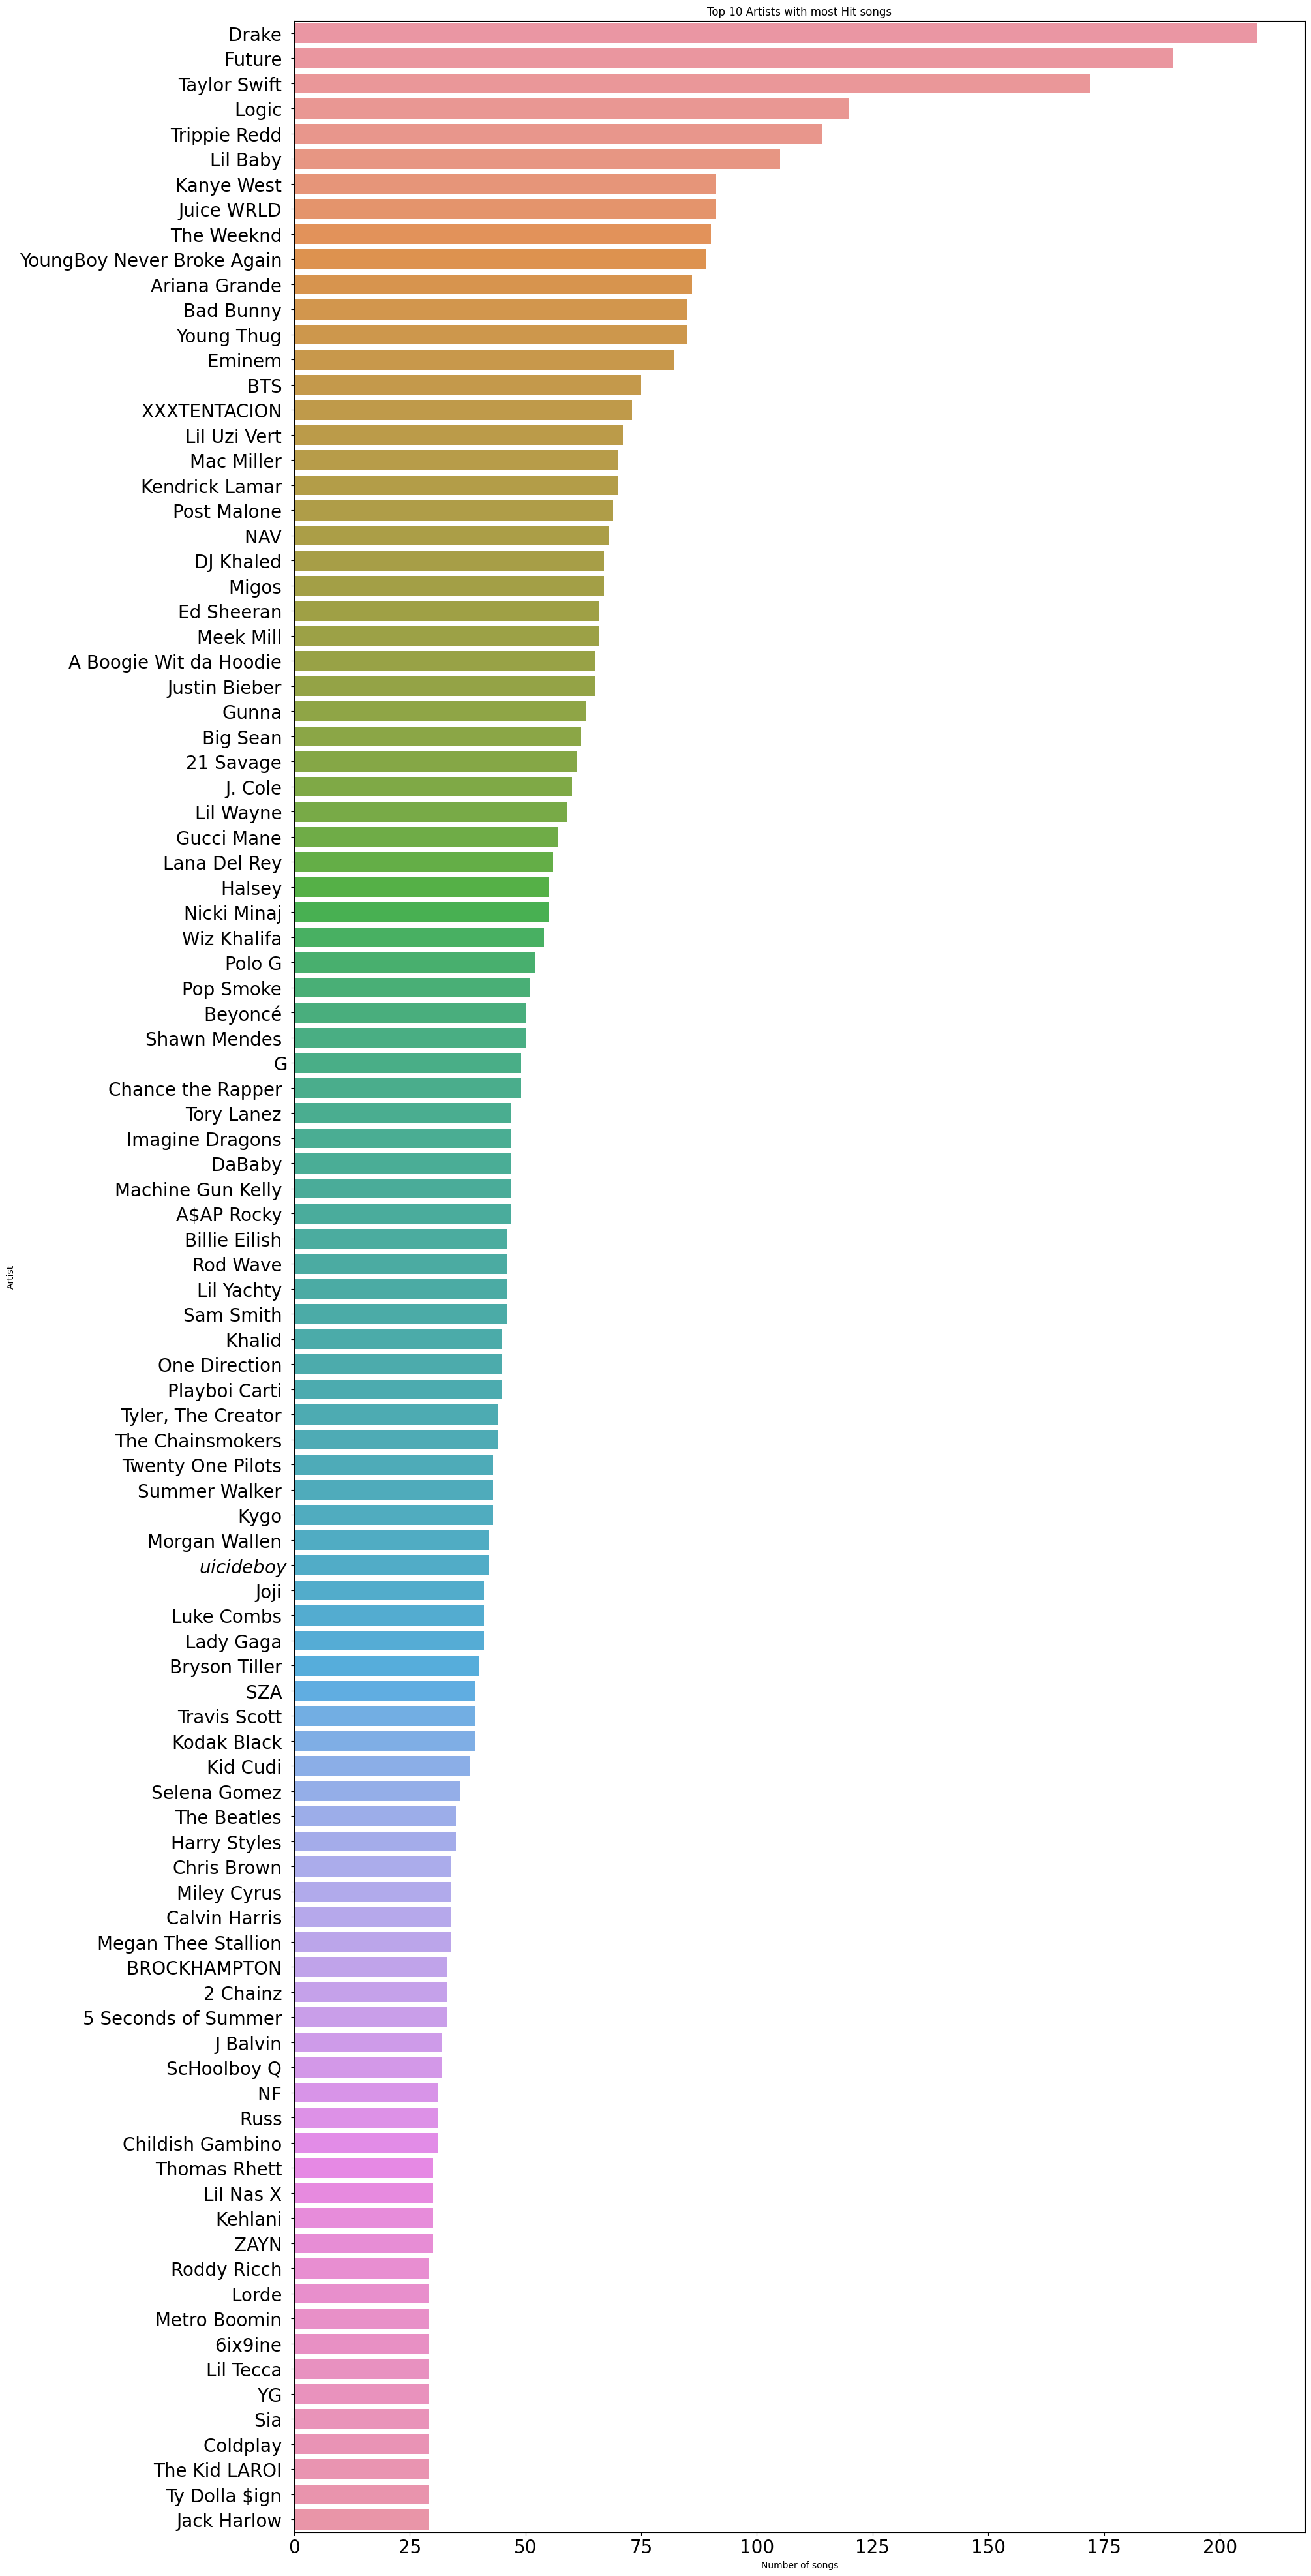

In [20]:
plt.figure(figsize=(20,50))
artists = df.groupby('Artist Name').size().sort_values(ascending=False)
topartists = artists.nlargest(100)
sns.barplot(y=topartists.index, x=topartists.values)
plt.title("Top 10 Artists with most Hit songs")
plt.ylabel("Artist")
plt.xlabel("Number of songs")
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

**Visualisasi Plotly**

In [21]:
import plotly.express as px

In [22]:
# Buat bagan garis dari lagu-lagu teratas berdasarkan aliran dari waktu ke waktu
fig = px.line(df.sort_values("Total Streams", ascending=False)[:10], x="Days", y="Total Streams", color="Song Name")

fig.show()

In [23]:
# Buat plot pencar dari lagu-lagu teratas berdasarkan posisi puncak dan aliran puncak
fig = px.scatter(df.sort_values("Peak Streams", ascending=False)[:10], x="Peak Position", y="Peak Streams", color="Song Name")

fig.show()

In [24]:
# Buat plot pencar 3D dari lagu-lagu teratas berdasarkan posisi, hari sejak rilis, dan aliran total
fig = px.scatter_3d(df.sort_values("Total Streams", ascending=False)[:10], x="Position", y="Days", z="Total Streams", color="Song Name")

fig.show()

In [25]:
# Buat plot pencar interaktif dari lagu-lagu teratas berdasarkan posisi dan aliran total
fig = px.scatter(df.sort_values("Total Streams", ascending=False)[:10], x='Position', y='Total Streams', color='Song Name', size='Total Streams',
           hover_name='Song Name', title='Top Songs by Total Streams')

fig.show()

In [26]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [27]:
# Buat plot pencar 3D dari artis top berdasarkan aliran total
fig = px.scatter_3d(df.groupby("Artist Name").sum().sort_values("Total Streams", ascending=False)[:10], x='Peak Streams', y='Total Streams', z='Position',
              color='Position', size='Total Streams', opacity=0.7, title='Top Artists by Total Streams')
fig.show()

<ipython-input-27-a3cea5c1aaa7>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Visualisasi Altair**

In [28]:
import altair as alt

In [29]:
# Buat bagan batang interaktif dari lagu-lagu teratas berdasarkan aliran total
chart = alt.Chart(df.sort_values("Total Streams", ascending=False)[:1000]).mark_bar().encode(
    x='Song Name:O',
    y='Total Streams:Q',
)

chart.interactive()

alt.Chart(...)

Fungsi alt.Chart dari perpustakaan Altair digunakan untuk membuat bagan batang dari data, dan fungsi mark_bar digunakan untuk menentukan jenis bagan yang akan dibuat. Fungsi encode digunakan untuk menentukan variabel x dan y untuk bagan, dan fungsi interaktif digunakan untuk membuat bagan menjadi interaktif.

**IPYWidgets Visualizations**



In [31]:
import ipywidgets as widgets

interactive(children=(IntSlider(value=10, description='n', max=20, min=1), Output()), _dom_classes=('widget-in…

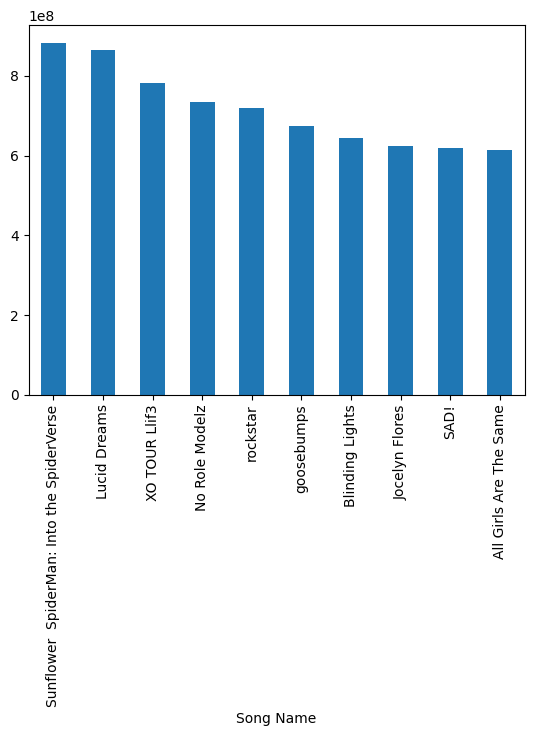

In [32]:
# Buat bagan batang interaktif dari lagu-lagu teratas berdasarkan aliran total
def plot_top_songs(n):
    df2 = df.sort_values("Total Streams", ascending=False)[:n]
    return df2.plot.bar(x='Song Name', y='Total Streams', legend=False)

widgets.interact(plot_top_songs, n=widgets.IntSlider(min=1, max=20, step=1, value=10));

**Lagu Dengan Posisi Puncak 1, Jumlah Kali Terbanyak**

In [33]:
df.columns

Index(['Position', 'Artist Name', 'Song Name', 'Days', 'Top 10 (xTimes)',
       'Peak Position', 'Peak Position (xTimes)', 'Peak Streams',
       'Total Streams'],
      dtype='object')

In [34]:
df.iloc[:,6] = pd.to_numeric(df.iloc[:,6].str.extract(r'(\d+)', expand=False))

<ipython-input-34-6dff1030f62c>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



In [35]:
top_1 = df.nlargest(20, 'Peak Position (xTimes)')
top_1[['Artist Name', 'Song Name', 'Peak Position', 'Peak Position (xTimes)']]

,Artist Name,Song Name,Peak Position,Peak Position (xTimes)
4,Post Malone,rockstar,1,124
22,Drake,One Dance,1,103
18,Roddy Ricch,The Box,1,85
36,The Chainsmokers,Closer,1,70
17,Drake,God's Plan,1,70
10,Kendrick Lamar,HUMBLE.,1,67
139,Steve Lacy,Bad Habit,1,66
44,DaBaby,ROCKSTAR,1,65
79,Cardi B,WAP,1,64
194,Rihanna,Work,1,62


**Lagu Dengan Jumlah Top 10 Terbanyak**

In [36]:
top_songs = df.nlargest(20, 'Top 10 (xTimes)')
top_songs[['Artist Name', 'Song Name', 'Peak Position', 'Top 10 (xTimes)']]

,Artist Name,Song Name,Peak Position,Top 10 (xTimes)
0,Post Malone,Sunflower SpiderMan: Into the SpiderVerse,1,302.0
29,The Kid LAROI,Stay,1,271.0
45,Lil Nas X,INDUSTRY BABY,1,267.0
16,Glass Animals,Heat Waves,1,248.0
6,The Weeknd,Blinding Lights,1,233.0
2,Lil Uzi Vert,XO TOUR Llif3,1,212.0
51,Harry Styles,As It Was,1,203.0
18,Roddy Ricch,The Box,1,197.0
38,The Weeknd,The Hills,1,194.0
12,Travis Scott,SICKO MODE,1,190.0


**Distribusi Popularitas Lagu**

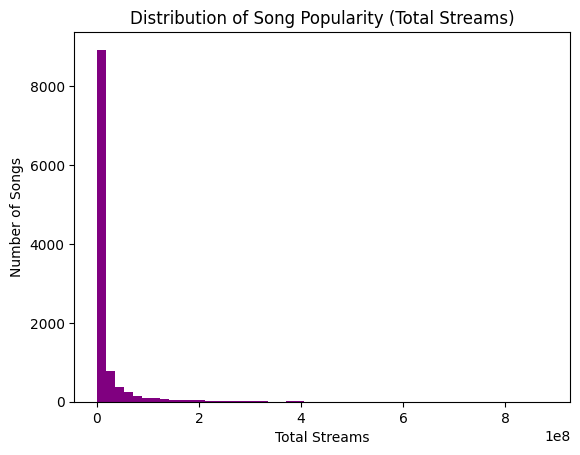

In [37]:
#Buat model KMeans dengan jumlah cluster yang ditentukan
plt.hist(df['Total Streams'], bins=50, color='purple')

# Tambahkan label dan judul
plt.xlabel("Total Streams")
plt.ylabel("Number of Songs")
plt.title("Distribution of Song Popularity (Total Streams)")

# Tunjukkan plot
plt.show()

**Rata-Rata Popularitas Lagu per Artis**

In [38]:
# Kelompokkan data berdasarkan artis dan hitung rata-rata aliran total
grouped = df.groupby("Artist Name").mean().reset_index()

# Plot plot kotak dari total aliran rata-rata per artis
fig = px.box(grouped, x="Artist Name", y="Total Streams", points="all", title='Average Popularity of Songs per Artist')

fig.show()

<ipython-input-38-664052d7d2ed>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



**Clustering Through KMeans**

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [40]:
# Kelompokkan data menurut artis dan jumlah total aliran
grouped = df.groupby("Artist Name").sum()

<ipython-input-40-3eee6ef415ce>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [41]:
# Buat model KMeans dengan jumlah cluster yang ditentukan
kmeans = KMeans(n_clusters=5)

In [42]:
# Sesuaikan model dengan data
kmeans.fit(grouped[["Total Streams"]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=5)

In [46]:
# Dapatkan label cluster
labels = kmeans.labels_

In [47]:
# Tambahkan label cluster sebagai kolom ke data yang dikelompokkan
grouped["Cluster"] = labels

**Mengelompokkan Artis Berdasarkan Aliran Total**

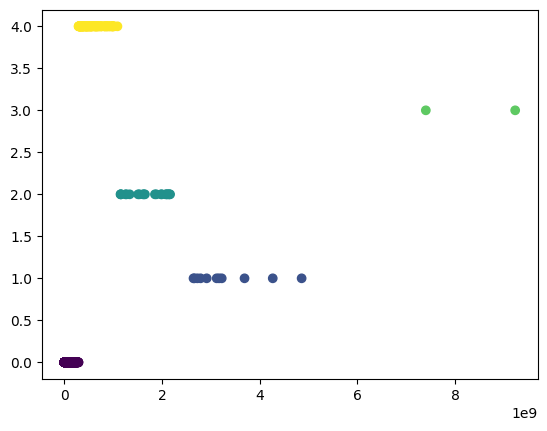

In [48]:
# Plot data dan titik warna berdasarkan label cluster
plt.scatter(grouped["Total Streams"], grouped["Cluster"], c=grouped["Cluster"], cmap='viridis')
# Show the plot
plt.show()

Keluaran dari algoritma clustering k-means adalah sekumpulan k cluster, dimana setiap cluster adalah sekelompok titik data yang serupa. Dalam hal ini, titik datanya adalah artis, dan kemiripannya akan didasarkan pada jumlah aliran. Algoritme mencoba mempartisi data menjadi k k cluster sedemikian rupa sehingga jumlah kuadrat jarak antara setiap titik data dan pusat clusternya diminimalkan. Pusat klaster diwakili oleh rata-rata titik data di setiap klaster. Outputnya biasanya berupa kumpulan tugas cluster untuk setiap titik data dan lokasi pusat cluster.

Dalam skenario khusus ini, output dapat digunakan untuk mengidentifikasi artis yang memiliki tingkat popularitas yang sama berdasarkan jumlah streaming mereka. Ini dapat berguna bagi para profesional industri musik untuk membuat keputusan yang tepat tentang pemasaran dan promosi, serta bagi penggemar musik untuk menemukan artis baru yang memiliki tingkat popularitas yang sama dengan favorit mereka.